## 3.5: Using quantile-quantile plots to check for normality

Q-Q plots are an easy way to quickly check whether your data are consistent with a normal distribution (or indeed any other type of distribution where you know how to describe the PDF).

First, we'll see how to calculate them by hand. Then, we'll use a ```scipy.stats``` function to perform the calculation for us.

### 3.5.1: Q-Q plots by hand

Let's generate some random data drawn from the uniform distribution:

In [18]:
# set up libraries
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline

[ 1.03447354  0.64250152  1.13793026 -1.34133733  0.29392459  2.8778847
  2.67719903  1.73660015 -1.56268385 -1.20257158]


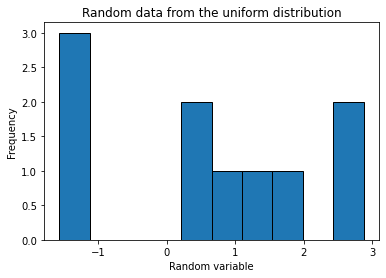

In [19]:
x = np.random.uniform(low=-2,high=3,size=10)
print(x)
plt.hist(x,edgecolor='k')
plt.xlabel('Random variable')
plt.ylabel('Frequency')
plt.title('Random data from the uniform distribution');

As a first step, we'll calculate the quantiles from our "observed" data, ```x```.

In [20]:
print('There are {} observations in x'.format(len(x)))

There are 10 observations in x


We will use the method that we saw in class, and calculate 9 quantiles for our data set containing 10 observations. There exist many different ways to decide how to choose the quantiles, but we will use this choice as it is simple and easier to understand than the other methods.

To calculate the quantiles, we can use the ```np.percentile``` function that we used previously to calculate Q1, Q2 and Q3 when we wanted to calculate the interquartile range.

To calculate the IQR, we used ```np.percentile(x,[25,50,75])```. Here, we just need to replace the ```[25,50,75]``` by the quantiles that we want to calculate:

In [21]:
# define the quantiles to be calculated (note: percentiles = quantiles * 100, 
# they are the same thing, but quantiles are expressed as a fraction, and percentiles as
# a percentage)
quantiles = np.arange(1,len(x))/len(x)
percentiles = quantiles * 100
print('Chosen quantiles: ',percentiles)

# calculate the quantiles
observed_q = np.percentile(x,percentiles)
print('Observed quantiles: ',observed_q)

Chosen quantiles:  [10. 20. 30. 40. 50. 60. 70. 80. 90.]
Observed quantiles:  [-1.36347199 -1.23032473 -0.15502426  0.50307074  0.83848753  1.07585623
  1.31753122  1.92471993  2.6972676 ]


We know that our data were generated with a uniform distribution, but imagine that we don't know this, and that we want to see whether they come from a normal distribution.

To do this, we need to calculate the same 9 quantiles for the normal distribution as we just calculated for the data set. 

We saw in the last notebook that we can use the ```norm.ppf(proba)``` function from ```scipy.stats``` to calculate the Z value for which the area under the curve to the left has probability=*proba*. There is thus a probability=*proba* of observing a value less than or equal to the given Z value. 

This definition corresponds exactly to our quantiles, so we can use this function to find the corresponding quantiles for the normal distribution:

In [22]:
import scipy.stats as ss
# calculate the theoretical quantiles
theoretical_q = ss.norm.ppf(quantiles)
print('Theoretical quantiles for the standard normal distribution: ',observed_q)

Theoretical quantiles for the standard normal distribution:  [-1.36347199 -1.23032473 -0.15502426  0.50307074  0.83848753  1.07585623
  1.31753122  1.92471993  2.6972676 ]


This is all we need to make the Q-Q plot. We will also add a straight line so that we can compare the data against it. We know that $x = \mu + \sigma Z$, so we will use this as the equation of the straight line, $y=c + mx$, where we have plotted *Z* on the x-axis and *x* on the y-axis:

Estimates:
mu = 0.6231235861617573
sigma = 1.6314329419259772


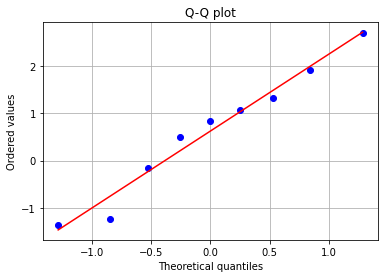

In [23]:
ax = plt.subplot(111)
plt.plot(theoretical_q,observed_q,'bo');
# we use polyfit to estimate sigma and mu from our x and y data
# deg = 1 tells polyfit to find a linear relationship
p = np.polyfit(theoretical_q,observed_q,deg=1)
# p contains the coefficients m and c for the relationship y = c + mx
print('Estimates:')
print('mu = {}'.format(p[1]))
print('sigma = {}'.format(p[0]))
# make the straight line:
y = p[1]+(p[0]*theoretical_q)
plt.plot(theoretical_q,y,'r-')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered values')
plt.title('Q-Q plot');
plt.grid()

You will probably find that your random data from the uniform distribution don't show a linear relationship with the theoretical values from the normal distribution that we used here.

Below, use the ```ss.uniform.ppf``` method, and repeat the calculation using theoretical quantiles from the uniform distribution. Note that your x-data will not be standardised, so the relationship $x = \mu + \sigma Z$ will not work here: you can use the function ```plot_straight_line``` that is defined for you below to add the straight line.

Theoretical quantiles for the standard normal distribution:  [-1.36347199 -1.23032473 -0.15502426  0.50307074  0.83848753  1.07585623
  1.31753122  1.92471993  2.6972676 ]
Estimates:
mu = 0.6231235861617573
sigma = 1.6314329419259772


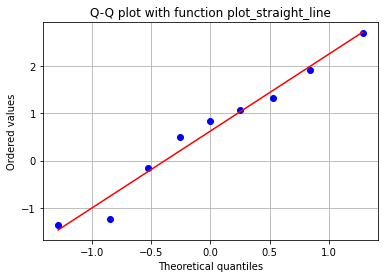

In [34]:
# enter your code here
def plot_straight_line(x,y):
    ''' add a best-fit straight line to the plot
    given input data x and y'''
    p = np.polyfit(x,y,deg=1)
    plt.plot(x,np.polyval(p,x),'r-')
    return

theoretical_q = ss.norm.ppf(quantiles)
print('Theoretical quantiles for the standard normal distribution: ',observed_q)
f1 = plt.figure()

ax = plt.subplot(111)

plt.plot(theoretical_q,observed_q,'bo');
print('Estimates:')
print('mu = {}'.format(p[1]))
print('sigma = {}'.format(p[0]))
# make the straight line:
#y = straight_line[1]+(straight_line[0]*theoretical_q)
#plt.plot(theoretical_q,y,'r-')
straight_line = plot_straight_line(theoretical_q, observed_q)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered values')
plt.title('Q-Q plot with function plot_straight_line');
plt.grid()

You should find that the data are closer to the straight line than for the example above with the normal distribution.

### 3.5.2: Q-Q plots with scipy

```scipy``` can make Q-Q plots for you automatically using the ```stats.probplot``` command. The example below shows how to compare the random data generated previously to the normal distribution:

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-1.56268385, -1.34133733, -1.20257158,  0.29392459,  0.64250152,
          1.03447354,  1.13793026,  1.73660015,  2.67719903,  2.8778847 ])),
 (1.6997940946946284, 0.6293921021058837, 0.9743132053293575))

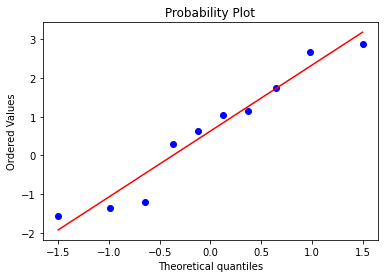

In [35]:
ss.probplot(x,dist='norm',plot=plt)

Try making a plot for the uniform distribution below:

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-1.44366766, -1.29789223, -1.20650323, -0.22093377,  0.00863366,
          0.26678044,  0.33491544,  0.72919027,  1.34865429,  1.48082279])),
 (1.119458363206794, -1.1367481096884002e-16, 0.9743132053293577))

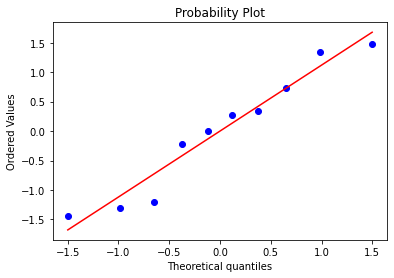

In [37]:
# enter your code here
mu = np.mean(x)
sigma = np.std(x)
Z = (x-mu)/sigma
ss.probplot(Z,dist='norm',plot=plt)

## 3.6: Numerical tests to check for normality

Some of the common tests to check for normality are:
* Lilliefor's test
* The Shapiro-Wilk test
* The Anderson-Darling test

You can find these tests in python:
* Lilliefor's test: ```statsmodels.stats.lilliefors```
* Shapiro-Wilk: ```scipy.stats.shapiro```
* Anderson-Darling: ```scipy.stats.anderson```

Here is an example of using the Anderson-Darling test (with more explanation below):

Test statistic:  0.6119118271958826
Critical values:  [0.538 0.613 0.736 0.858 1.021]
Significance levels (%):  [15.  10.   5.   2.5  1. ]
---
The test statistic indicates that the data are not normally distributed with 85% confidence


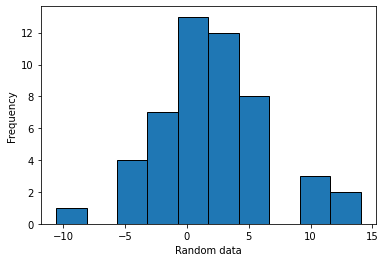

In [38]:
# generate some random data drawn from the normal distribution
x = np.random.normal(loc=2,scale=5,size=50)
plt.hist(x,edgecolor='k')
plt.xlabel('Random data')
plt.ylabel('Frequency')

# import the Anderson-Darling method
from scipy.stats import anderson as anderson

# apply the test
statistic,critical_values,significance = anderson(x, dist='norm')
print('Test statistic: ',statistic)
print('Critical values: ',critical_values)

print('Significance levels (%): ',significance) # we will meet significance levels next week
print('---')
if statistic < critical_values[0]:
    print('The test statistic indicates that the data are normally '\
          'distributed with high confidence')
elif (statistic >= critical_values[0]) & (statistic <= critical_values[-1]):
    ix = np.where(statistic < critical_values)[0][0]
    print('The test statistic indicates that the data are not '\
          'normally distributed with {:2.0f}% confidence'.format(100-significance[ix-1]) )
else:
    print('The test statistic indicates that the data are not normally '\
          'distributed with high confidence')

To use this test, we have to compare the test statistic returned by the function against the list of critical values that it gives us.

If the test statistic is less than the smallest of the critical values, then we can be confident that the data come from the normal distribution.

If the test statistic is greater than the smallest of the critical values, we suspect that the data might not be normally distributed. Our belief that the data are not normally distributed increases as the value test statistic increases. The significance levels allow us to quantify this belief. We will look in more detail at significance levels in the next two sessions.

To use the Shapiro-Wilk test, the method is similar, but here the function will return the test statistic and a probability (p-value). If the probability is > 0.1, we are confident that the data are normally distributed. If the probability is > 0.05, but less than 0.1, we are fairly confident that the data are normally distributed. If the probability is < 0.05, there is a fair chance that the data are not normally distributed.

In [39]:
test_statistic, p_value=ss.shapiro(x)
print('p-value =',p_value)

p-value = 0.1801961213350296


Try generating some uniformly distributed data and applying the two tests above:

Test statistic:  5.672583892572561
Critical values:  [0.571 0.651 0.781 0.911 1.083]
Significance levels (%):  [15.  10.   5.   2.5  1. ]
---
The test statistic indicates that the data are not normally distributed with high confidence


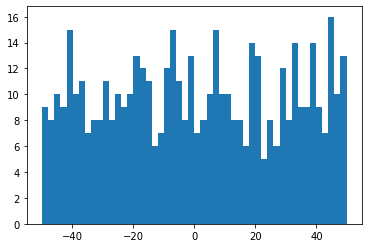

In [53]:
# enter your code here
data = np.random.uniform(low=-50,high=50,size=500)
mean = np.mean(data)
std = np.std(data)
data_sorted = np.sort(data)
#print(data_sorted)

data_normalized = (data-mean)/std
plt.hist(data, bins=50)

# apply the test
statistic,critical_values,significance = anderson(data_normalized, dist='norm')
print('Test statistic: ',statistic)
print('Critical values: ',critical_values)

print('Significance levels (%): ',significance) # we will meet significance levels next week
print('---')
if statistic < critical_values[0]:
    print('The test statistic indicates that the data are normally '\
          'distributed with high confidence')
elif (statistic >= critical_values[0]) & (statistic <= critical_values[-1]):
    ix = np.where(statistic < critical_values)[0][0]
    print('The test statistic indicates that the data are not '\
          'normally distributed with {:2.0f}% confidence'.format(100-significance[ix-1]) )
else:
    print('The test statistic indicates that the data are not normally '\
          'distributed with high confidence')

As a final warning: the results of the various tests may not agree! In this case, you should decide whether the normality of the data is really critical for your analysis. 

A good solution is to collect more data. If it is not possible to collect more data, you should avoid using methods that are very sensitive to the normality of the data as much as possible.